In [181]:
#Importo las librerias de python que necesito
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import time

#Importo sklearn para KNN, PCA y las metricas
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, recall_score
from sklearn.manifold import TSNE
from keras.datasets import fashion_mnist

In [182]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Datos Train:",x_train.shape)
print("Datos Test:",x_test.shape) 
print("Labels Train",y_train.shape)
print("Labels Test",y_test.shape)

Datos Train: (60000, 28, 28)
Datos Test: (10000, 28, 28)
Labels Train (60000,)
Labels Test (10000,)


In [183]:
clothes = [[0,'T-shirt/top'], [1,'Trouser'], [2,'Pullover'], [3, 'Dress'], 
           [4, 'Coat'], [5, 'Sandal'], [6, 'Shirt'], [7, 'Sneaker'], [8, 'Bag'], [9, 'Ankle boot']]

print("Numeros de cada prenda de ropa")
clothes

Numeros de cada prenda de ropa


[[0, 'T-shirt/top'],
 [1, 'Trouser'],
 [2, 'Pullover'],
 [3, 'Dress'],
 [4, 'Coat'],
 [5, 'Sandal'],
 [6, 'Shirt'],
 [7, 'Sneaker'],
 [8, 'Bag'],
 [9, 'Ankle boot']]

In [184]:
#Convierto los datos para poder hacer el fit
nsamples, nx, ny = x_train.shape
x_train_new = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
x_test_new = x_test.reshape((nsamples,nx*ny))

print("Datos Train:", x_train_new.shape)
print("Datos Test:", x_test_new.shape)

Datos Train: (60000, 784)
Datos Test: (10000, 784)


In [185]:
#x_train_new = x_train_new[:50000]
#y_train = y_train[:50000]

In [186]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
x_train_transformed = tsne.fit_transform(x_train_new) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.028s...
[t-SNE] Computed neighbors for 60000 samples in 75.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'T-SNE projection')]

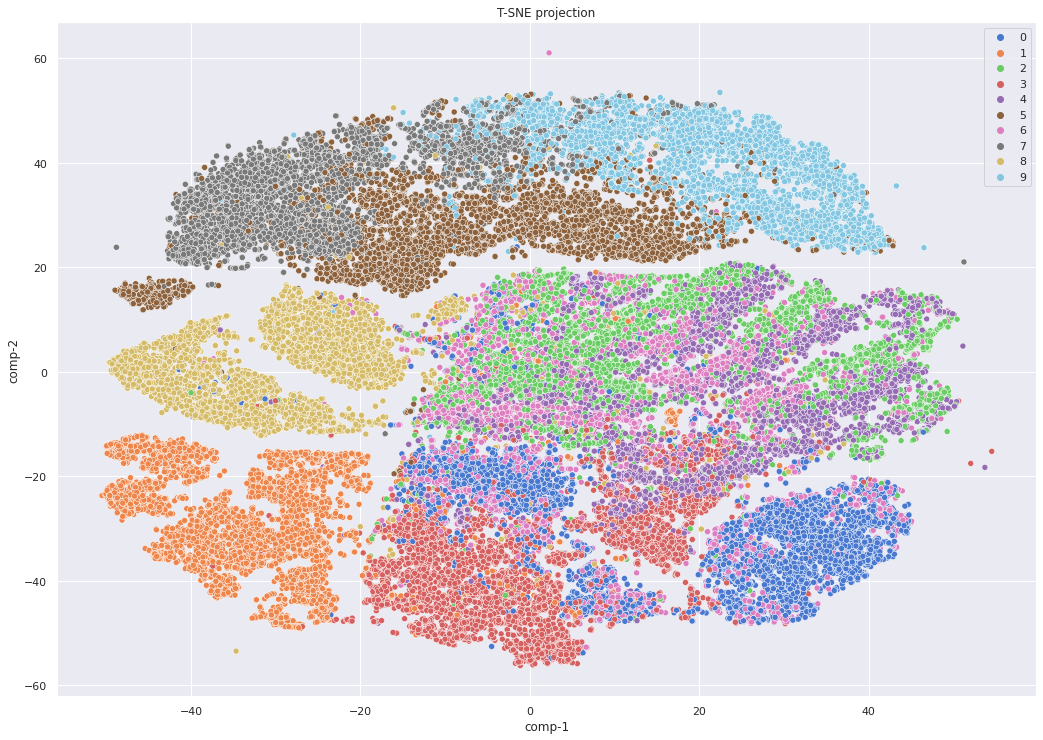

In [187]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = x_train_transformed[:,0]
df["comp-2"] = x_train_transformed[:,1]

sns.set(rc={'figure.figsize':(17.55,12.40)})

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 10),
                data=df).set(title="T-SNE projection") 


In [188]:
x_test_transformed = tsne.fit_transform(x_test_new)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 1.667s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 368.758559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.178894
[t-SNE] KL divergence after 1000 iterations: 1.609914


In [189]:
#Pruebo que pasa con Knn for the lols
n = 10
knn = KNeighborsClassifier(n)

knn.fit(x_train_transformed, y_train.flatten())
res_knn = knn.predict(x_test_transformed)

In [190]:
print("Accuracy:", accuracy_score(res_knn, y_test))

Accuracy: 0.0872


In [191]:
pca = PCA(15)

#aplico pca a los datos
pca.fit(x_train_new)
train_pca = pca.transform(x_train_new)
test_pca = pca.transform(x_test_new)


[Text(0.5, 1.0, 'T-SNE projection')]

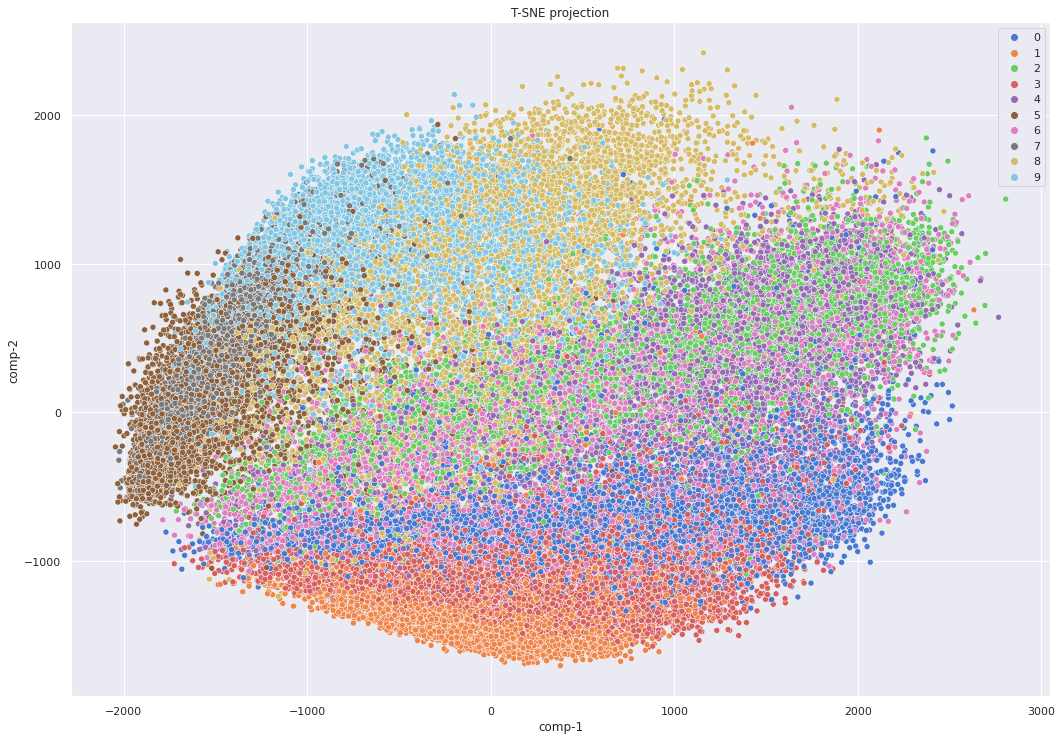

In [192]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = train_pca[:,0]
df["comp-2"] = train_pca[:,1]

sns.set(rc={'figure.figsize':(17.55,12.40)})

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("muted", 10),
                data=df).set(title="T-SNE projection") 
